In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import pandas as pd
import pandas as pd
#Punctuations
import string
#reg Expressions
import re
#emojis with description
import demoji
#sentences to words
from nltk.tokenize import TreebankWordTokenizer
#paras to sentences
from nltk.tokenize import sent_tokenize
#stopwords
from nltk.corpus import stopwords
#for converting word to vector
import gensim.models.word2vec as w2v

In [3]:
%%time
tweet_data = pd.read_csv("IRAhandle_tweets_1.csv")
#tweet_data.head()

Wall time: 2.3 s


In [4]:
rightTroll_data = tweet_data[(tweet_data['account_category'] == 'RightTroll')]

In [5]:
rightTroll_data['date'] = pd.to_datetime(rightTroll_data['publish_date'])
rightTroll_data['YEAR']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.year
rightTroll_data['MONTH']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.month
rightTroll_data['DAY']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.day
rightTroll_data2016 = rightTroll_data[(rightTroll_data['YEAR'] == 2016)]
rightTroll_data2017 = rightTroll_data[(rightTroll_data['YEAR'] == 2017)]
rightTroll_data2018 = rightTroll_data[(rightTroll_data['YEAR'] == 2018)]

C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [6]:
chron2016=pd.DataFrame(rightTroll_data2016.groupby(['MONTH','DAY']).count()).reset_index().rename(columns={'content':'Total Tweet'})[['MONTH','DAY','Total Tweet']]
chron2016=chron2016.pivot('DAY','MONTH','Total Tweet')
chron2017=pd.DataFrame(rightTroll_data2016.groupby(['MONTH','DAY']).count()).reset_index().rename(columns={'content':'Total Tweet'})[['MONTH','DAY','Total Tweet']]
chron2017=chron2017.pivot('DAY','MONTH','Total Tweet')
chron2018=pd.DataFrame(rightTroll_data2016.groupby(['MONTH','DAY']).count()).reset_index().rename(columns={'content':'Total Tweet'})[['MONTH','DAY','Total Tweet']]
chron2018=chron2018.pivot('DAY','MONTH','Total Tweet')

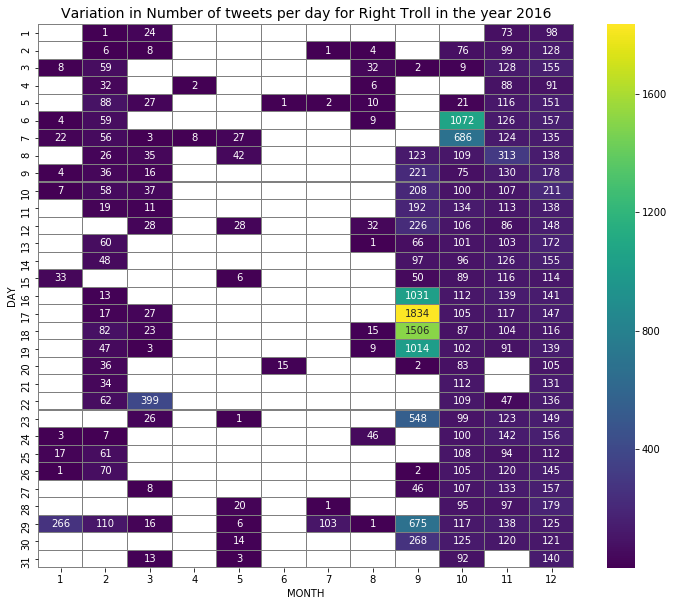

In [7]:
plt.figure(figsize=(12,10))
plt.title('Variation in Number of tweets per day for Right Troll in the year 2016', fontsize=14)
sns.heatmap(chron2016,annot=True,fmt='g', cmap='viridis',linecolor='grey',linewidths=0.06)

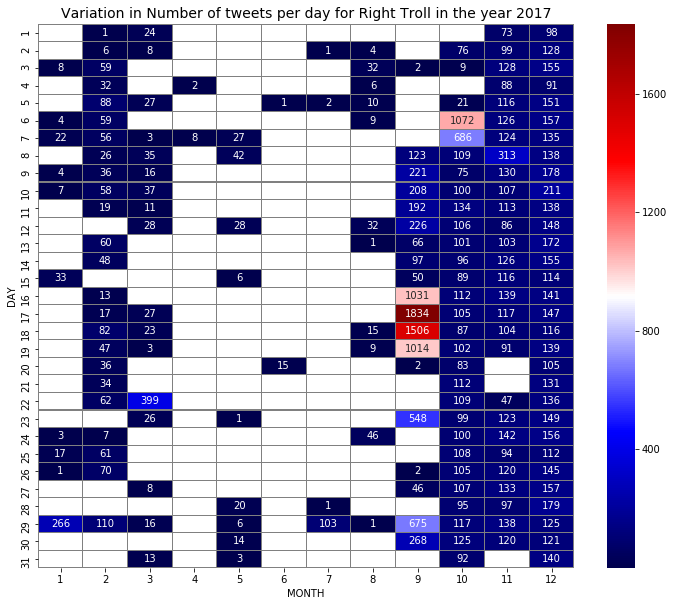

In [8]:
plt.figure(figsize=(12,10))
plt.title('Variation in Number of tweets per day for Right Troll in the year 2017', fontsize=14)
sns.heatmap(chron2017,annot=True,fmt='g', cmap='seismic',linecolor='grey',linewidths=0.06)

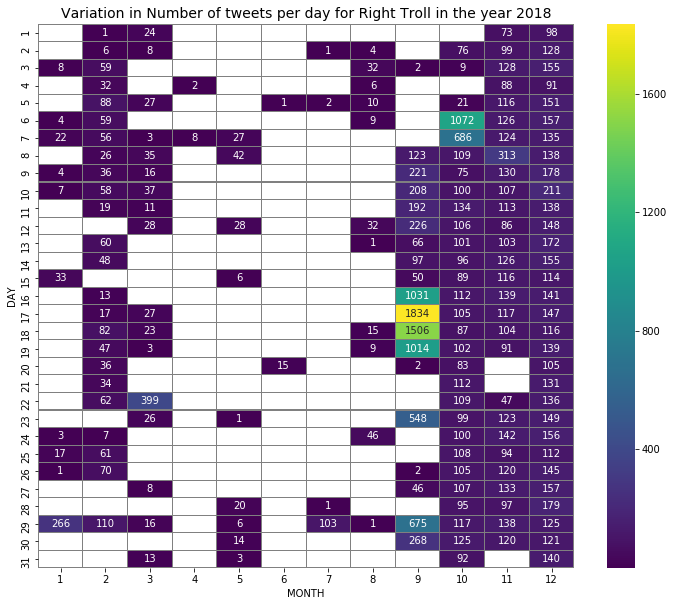

In [9]:
plt.figure(figsize=(12,10))
plt.title('Variation in Number of tweets per day for Right Troll in the year 2018', fontsize=14)
sns.heatmap(chron2018,annot=True,fmt='g', cmap='viridis',linecolor='grey',linewidths=0.06)

In [10]:
rightTroll_dataEnglish = rightTroll_data[(rightTroll_data['language'] == 'English')]

In [11]:
def extract_hashtags(tweet):
    hashtags_list = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_list.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_list.append(["0"])
    return hashtags_list[0]

In [12]:
all_hashtags = rightTroll_dataEnglish['content'].map(extract_hashtags).tolist()

In [13]:
oneList_hashtags = []
for i in all_hashtags:
    for j in i:
            oneList_hashtags.append(j)

In [14]:
oneList_hashtags_series = pd.Series(oneList_hashtags)
hashtag_counts = oneList_hashtags_series.value_counts()

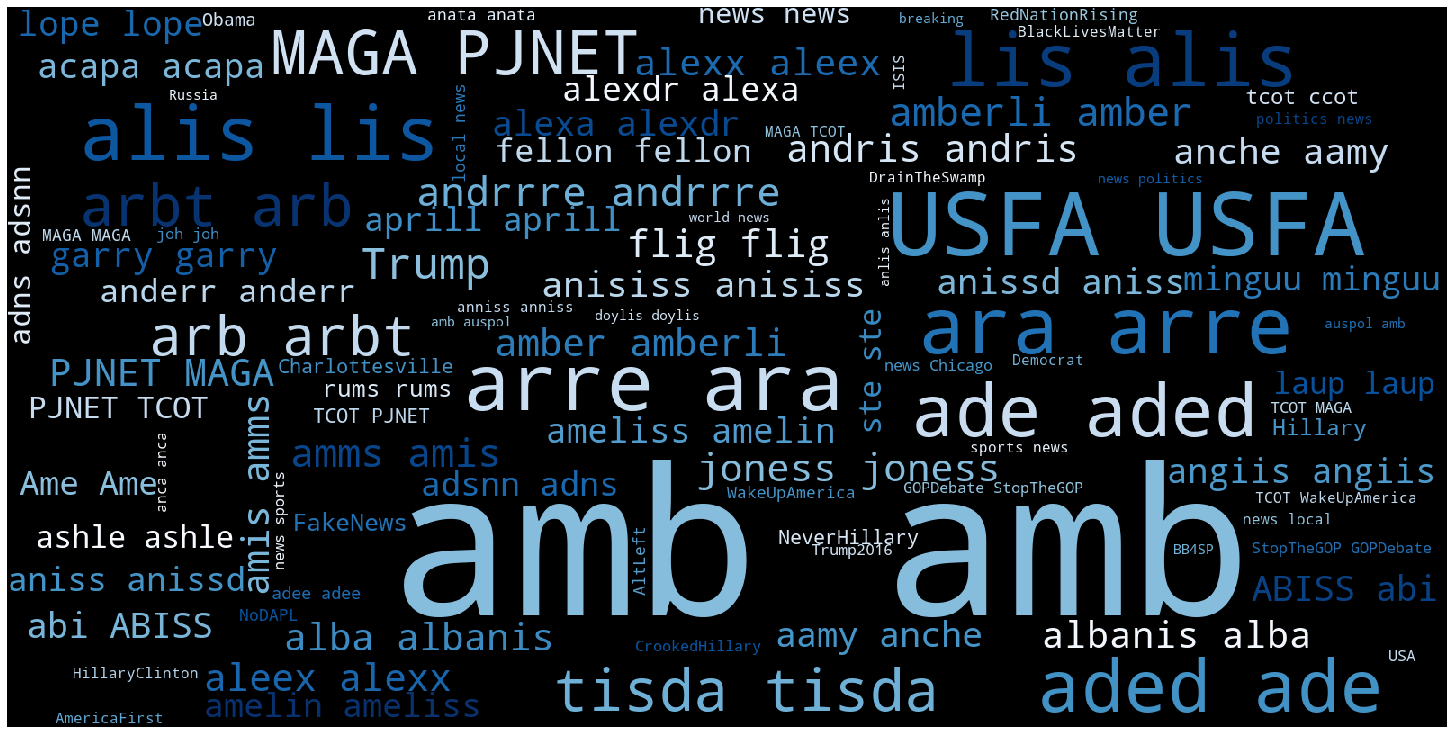

In [15]:
# Get hashtag terms from the series and convert to list
hashes = oneList_hashtags_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

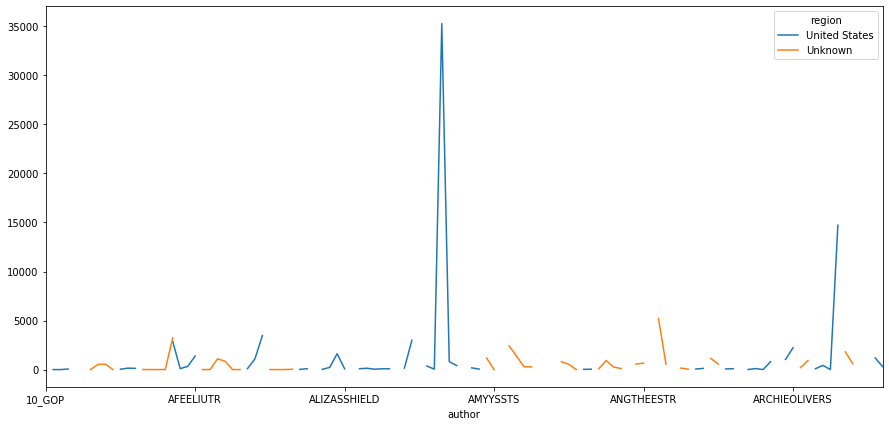

In [16]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
rightTroll_data.groupby(['author','region']).count()['content'].unstack().plot(ax=ax)

In [17]:
from collections import Counter

def getRetweets(text):
    for string in text:
        if isinstance(string,str):
            tokens = string.split(' ')
            if tokens[0] == 'RT' and tokens[1].startswith('@'):
                yield tokens[1]


retweets = getRetweets(rightTroll_dataEnglish['content'])
retweet_frequency = Counter(retweets)
#retweet_frequency.most_common(100)

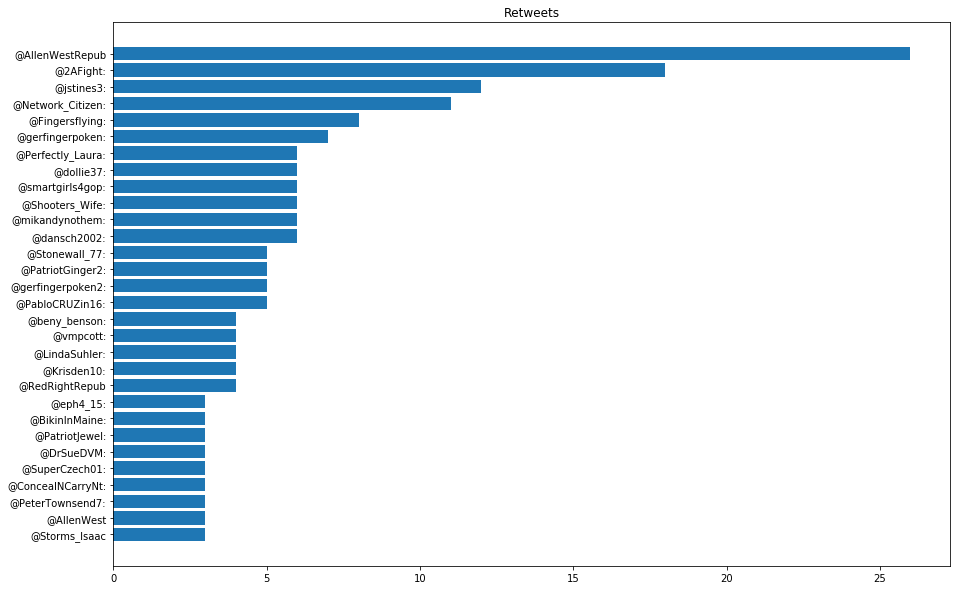

In [18]:
plt.figure(figsize=(15,10))
top30 = retweet_frequency.most_common(30)
keys = [x[0] for x in top30]
vals = [x[1] for x in top30]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals)
plt.yticks(xpos,keys)
plt.title("Retweets")

plt.show()